In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("USA_Housing.csv")
print(df.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09      23086.80050  1.059034e+06  
1                          3.09      40173.07217  1.505891e+06  
2                          5.13      36882.15940  1.058988e+06  
3                          3.26      34310.24283  1.260617e+06  
4                          4.23      26354.10947  6.309435e+05  


In [6]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df)

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [8]:
df['Cluster'] = kmeans.labels_

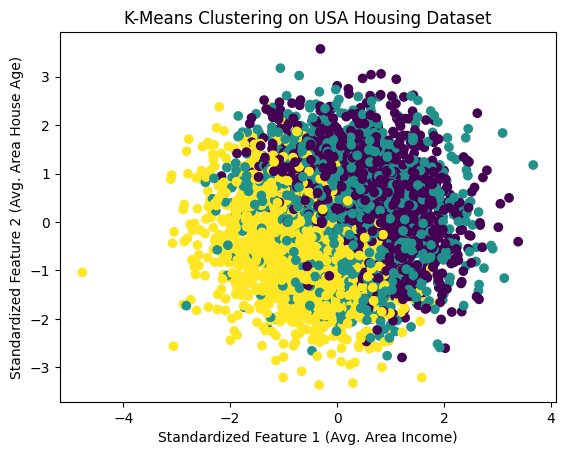

In [9]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering on USA Housing Dataset')
plt.xlabel('Standardized Feature 1 (Avg. Area Income)')
plt.ylabel('Standardized Feature 2 (Avg. Area House Age)')
plt.show()

In [10]:
print(df.groupby('Cluster').mean())

         Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
Cluster                                                                     
0            74052.398241             6.363196                   6.374128   
1            70744.555557             6.111349                   7.921322   
2            61108.619014             5.467809                   6.671980   

         Avg. Area Number of Bedrooms  Area Population         Price  
Cluster                                                               
0                            3.236213     39213.488642  1.392158e+06  
1                            5.098209     37611.574538  1.445473e+06  
2                            3.614186     31757.070979  8.659159e+05  


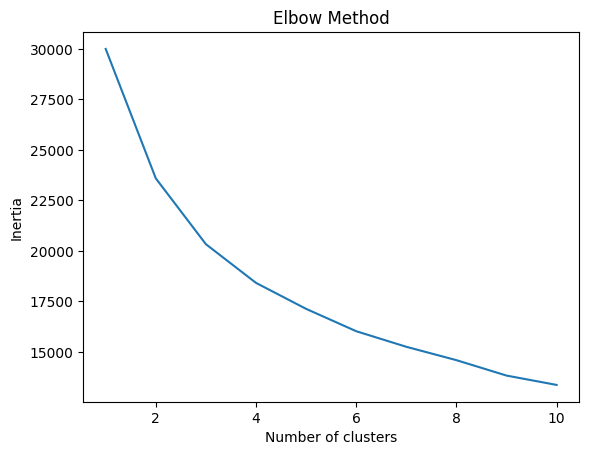

In [11]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()